# Vectors

Informally, we think of a vector as an object that has magnitude and direction. More formally, we think of an $n$-dimensional vector as an ordered tuple of numbers $(x_1, x_2, \ldots, x_n)$ that follows the rules of scalar multiplication and vector addition.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Vector space

A vector space is a collection of vectors which is closed under addition and scalar multiplication. 

Examples:

- Euclidean plane $\mathbb{R}^2$ is a familiar vector space
- The vector $\pmatrix{0 & 0}$ is a trivial vector space that is a **vector subspace** of Euclidean space.
- Polynomial functions of order $k$ is a vector space

Polynomials of order 3 have the form $ax^3 + bx^2 + cx + d$, and can be represented as the vector

$$
\pmatrix{a \\ b \\ c \\ d}
$$

- The space of all continuous functions is a vector space

Consider two continuous functions, say, $f(x) = x^2$ and $g(x) = x^3$. Scalar multiplication $(2 f)(x) = 2x^2$ and addition  $(f + g)(x) = x^2 + x^3$ are well defined and the result is a continuous function, so the space of all continuous functions is also a vector space. In this case, it is an infinite-dimensional vector space. 

Vector spaces are important because the theorems of linear algebra apply to all vector spaces, not just Euclidean space.

## Column vectors

When we describe a vector $x$, we mean the column vector.  The row vector is denoted $x^T$.

In [3]:
x = np.random.random((5,1))
x

array([[0.12813755],
       [0.57137424],
       [0.24794077],
       [0.8882615 ],
       [0.60406625]])

In [4]:
x.T

array([[0.12813755, 0.57137424, 0.24794077, 0.8882615 , 0.60406625]])

#### Dimensions

In [5]:
len(x)

5

#### Length

The length of a vector is the Euclidean norm (i.e. Pythagoras theorem)

In [6]:
np.linalg.norm(x)

1.2483056173289968

In [7]:
np.sqrt(np.sum(x**2))

1.2483056173289968

#### Direction

In [8]:
n = x/np.linalg.norm(x)
n

array([[0.10264918],
       [0.45771984],
       [0.19862185],
       [0.71157374],
       [0.48390894]])

In [9]:
np.linalg.norm(n)

1.0

## Norms and distances

Recall that the 'norm' of a vector $v$, denoted $||v||$ is simply its length.  For a vector with components 
$$v = \left(v_1,...,v_n\right)$$
the norm of $v$ is given by:
    
$$||v|| = \sqrt{v_1^2+...+v_n^2}$$

The distance between two vectors is the length of their difference:
    
$$d(v,w) = ||v-w||$$

In [10]:
u = np.array([3,0]).reshape((-1,1))
v = np.array([0,4]).reshape((-1,1))

In [11]:
np.linalg.norm(u - v)

5.0

In [12]:
np.linalg.norm(v - u)

5.0

In [13]:
np.sqrt(np.sum((u - v)**2))

5.0

## Vector operations

In [14]:
x = np.arange(3).reshape((-1,1))
y = np.arange(3).reshape((-1,1))

### Scalar multiplication

In [15]:
3 * x

array([[0],
       [3],
       [6]])

### Vector addition

In [16]:
x + y

array([[0],
       [2],
       [4]])

### Linear operations

In [17]:
3*x + 4*y

array([[ 0],
       [ 7],
       [14]])

### Transposition

In [18]:
x.T

array([[0, 1, 2]])

## Dot product

The dot product of two vectors $u$ and $v$ is written as $u \cdot v$ and its value is given by $u^Tv$. The dot product of two $n$ dimensional vectors $v$ and $w$ is given by:

$$u \cdot v = u_1v_1+...+u_nv_n$$

I.e. the dot product is just the sum of the product of the components.

The inner product $\langle u,v \rangle$ of two vectors is a generalization of the dot product. It is any function that takes two vectors, returns a scalar (here we just consider inner products that return real numbers), and obeys the following properties:

- symmetry $\langle u,v \rangle = \langle v,u \rangle$
- positive definite 
    - $\langle v,v \rangle \ge 0$
    - $\langle v,v \rangle = 0 \implies v = 0$
- bilinear
    - $\langle au,v \rangle = a \langle u,v \rangle$
    - $\langle u + v,w \rangle = \langle u,w \rangle + \langle v,w \rangle$
    - Linearity also applies to second argument because of symmetry

Any inner product determines a norm via:

$$||v|| = \langle v,v \rangle^{\frac12}$$

### Calculating dot products

In [19]:
u = np.array([3,3]).reshape((-1,1))
v = np.array([2,0]).reshape((-1,1))

In [20]:
np.dot(u.T, v)

array([[6]])

You can also use the `@` operator to do matrix multiplication

In [21]:
u.T @ v

array([[6]])

In [22]:
np.sum(u * v)

6

### Geometry of dot product

Geometrically, the dot product is the product of the length of $v$ and the length of the projection of $u$ onto the unit vector $\widehat{v}$. 

$$
u \cdot v = \lvert u \rvert \lvert v \rvert \cos \theta
$$

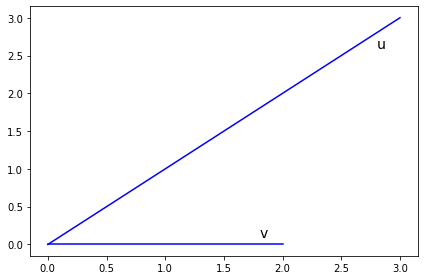

In [23]:
plt.plot(*zip(np.zeros_like(u), u), 'b-')
plt.text(1.8, 0.1, 'v', fontsize=14)
plt.plot(*zip(np.zeros_like(v), v), 'b-')
plt.text(2.8, 2.6, 'u', fontsize=14)
plt.tight_layout()
pass

### Angle between two vectors

In [24]:
cos_angle = np.dot(u.T, v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [25]:
cos_angle

array([[0.70710678]])

In [26]:
theta = 180/np.pi*np.arccos(cos_angle)

In [27]:
theta

array([[45.]])

## Outer product

Note that the inner product is just matrix multiplication of a $1\times n$ vector with an $n\times 1$ vector.  In fact, we may write:

$$\langle v,w \rangle = v^Tw$$

The *outer product* of two vectors is just the opposite. It is given by:

$$v\otimes w = vw^T$$

Note that I am considering $v$ and $w$ as *column* vectors.  The result of the inner product is a *scalar*. The result of the outer product is a *matrix*.

For example, if $v$ and $w$ are both in $\mathbb{R}^3$

$$
v \otimes w = \pmatrix{v_1\\v_2\\v_3} \pmatrix{w_1 & w_2 & w_3} = \pmatrix{
v_1w_1 & v_1w_2 & v_1w_3\\
v_2w_1 & v_2w_2 & v_2w_3 \\ 
v_3w_1 & v_3w_2 & v_3w_3}
$$

In [28]:
v = np.array([1,2,3]).reshape((-1,1))

In [29]:
v

array([[1],
       [2],
       [3]])

In [30]:
v @ v.T

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [31]:
np.outer(v, v)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])